In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt

In [3]:
digits = load_digits()

In [20]:
X_pca = PCA(n_components=30,random_state=42).fit_transform(digits.data)

In [21]:
gmm = GaussianMixture(n_components= 10,covariance_type='full',random_state=42)
gmm.fit(X_pca)

GaussianMixture(n_components=10, random_state=42)

In [22]:
pred = gmm.predict(X_pca)

In [23]:
def map_labels(y_true,y_pred):
    mapped = np.zeros_like(y_pred)
    for i in range(10):
        mask = (y_pred==1)
        if np.any(mask):
            mapped[mask] = mode(y_true[mask],keepdims=False).mode
    return mapped    

In [24]:
final = map_labels(digits.target,pred)

In [25]:
print("Accuracy : ",accuracy_score(digits.target,final))

Accuracy :  0.17863105175292154


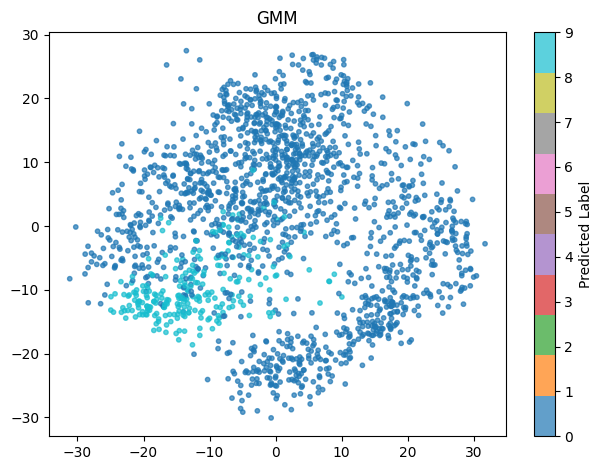

In [26]:
X_pca2D = PCA(n_components=2).fit_transform(digits.data)
plt.scatter(X_pca2D[:,0],X_pca2D[:,1],c=final,cmap='tab10',s=10,alpha=0.7)
plt.title("GMM")
plt.colorbar(label='Predicted Label')
plt.tight_layout()
plt.show()